In [86]:
import numpy as np
import matplotlib.pyplot as plt

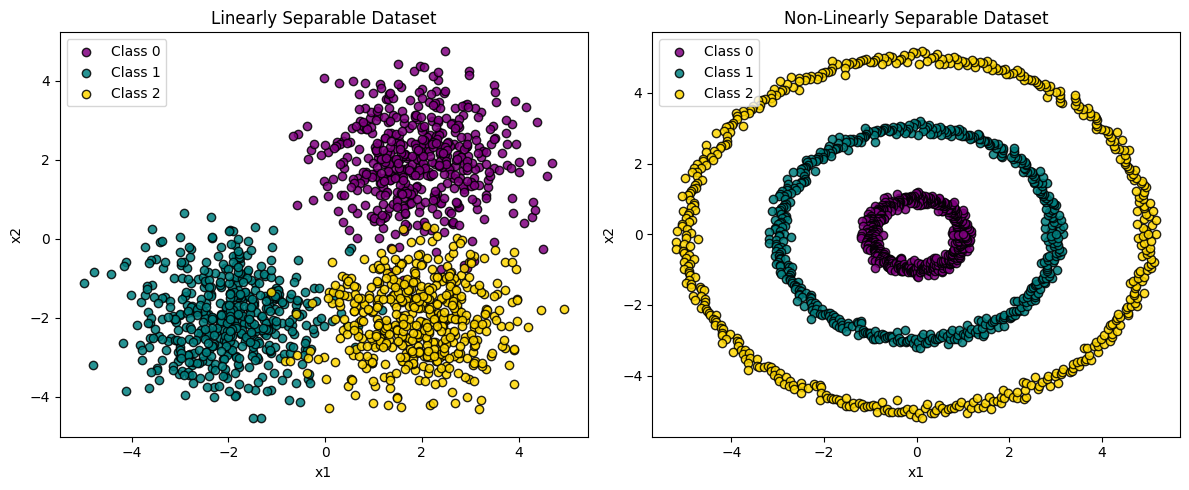

In [87]:
import numpy as np
import matplotlib.pyplot as plt

# ---------- Linear Dataset ----------
def generate_linear_dataset(samples_per_class=500):
    np.random.seed(0)

    class1 = np.random.randn(samples_per_class, 2) + [2, 2]
    class2 = np.random.randn(samples_per_class, 2) + [-2, -2]
    class3 = np.random.randn(samples_per_class, 2) + [2, -2]

    return [class1, class2, class3]


# ---------- Nonlinear Dataset ----------
def generate_nonlinear_dataset(samples_per_class=500):
    np.random.seed(1)

    theta = np.linspace(0, 2*np.pi, samples_per_class)
    noise = np.random.randn(samples_per_class) * 0.1

    r1 = 1 + noise
    r2 = 3 + noise
    r3 = 5 + noise

    class1 = np.c_[r1*np.cos(theta), r1*np.sin(theta)]
    class2 = np.c_[r2*np.cos(theta), r2*np.sin(theta)]
    class3 = np.c_[r3*np.cos(theta), r3*np.sin(theta)]

    return [class1, class2, class3]


# ---------- Save Dataset ----------
def save_dataset(filename, classes):
    with open(filename, "w") as f:
        for cls in classes:
            f.write(str(len(cls)) + "\n")
            for x, y in cls:
                f.write(f"{x} {y}\n")


# Generate datasets
linear_classes = generate_linear_dataset()
nonlinear_classes = generate_nonlinear_dataset()

# Save datasets
save_dataset("linear_separable.txt", linear_classes)
save_dataset("nonlinear_separable.txt", nonlinear_classes)


# ---------- COLORS (MATCH DECISION REGION STYLE) ----------
point_colors = ['purple', 'teal', 'gold']


# ---------- Side-by-Side Plot ----------
plt.figure(figsize=(12, 5))

# ===== Linear dataset =====
plt.subplot(1, 2, 1)
for i, cls in enumerate(linear_classes):
    plt.scatter(
        cls[:, 0], cls[:, 1],
        color=point_colors[i],
        edgecolors='k',
        alpha=0.85,
        label=f"Class {i}"
    )
plt.title("Linearly Separable Dataset")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()


# ===== Nonlinear dataset =====
plt.subplot(1, 2, 2)
for i, cls in enumerate(nonlinear_classes):
    plt.scatter(
        cls[:, 0], cls[:, 1],
        color=point_colors[i],
        edgecolors='k',
        alpha=0.85,
        label=f"Class {i}"
    )
plt.title("Non-Linearly Separable Dataset")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()

plt.tight_layout()
plt.show()


In [88]:
import numpy as np
import matplotlib.pyplot as plt

# --------------------------------------------------
# Load dataset from file
# --------------------------------------------------
def load_dataset(file_path):
    X, y = [], []
    with open(file_path, 'r') as f:
        lines = f.readlines()

    i = 0
    class_label = 0

    while i < len(lines):
        n = int(lines[i].strip())
        i += 1
        for _ in range(n):
            x1, x2 = map(float, lines[i].split())
            X.append([x1, x2])
            y.append(class_label)
            i += 1
        class_label += 1

    return np.array(X), np.array(y), class_label


# --------------------------------------------------
# Split dataset (60-20-20)
# --------------------------------------------------
def split_dataset(X, y, num_classes):
    X_train, y_train = [], []
    X_val, y_val = [], []
    X_test, y_test = [], []

    for c in range(num_classes):
        idx = np.where(y == c)[0]
        np.random.shuffle(idx)

        n = len(idx)
        n_train = int(0.6 * n)
        n_val = int(0.2 * n)

        train_idx = idx[:n_train]
        val_idx = idx[n_train:n_train + n_val]
        test_idx = idx[n_train + n_val:]

        for i in train_idx:
            X_train.append(X[i])
            y_train.append(y[i])
        for i in val_idx:
            X_val.append(X[i])
            y_val.append(y[i])
        for i in test_idx:
            X_test.append(X[i])
            y_test.append(y[i])

    return (np.array(X_train), np.array(y_train),
            np.array(X_val), np.array(y_val),
            np.array(X_test), np.array(y_test))


# --------------------------------------------------
# One-hot encoding
# --------------------------------------------------
def one_hot(y, num_classes):
    Y = np.zeros((len(y), num_classes))
    for i, label in enumerate(y):
        Y[i, label] = 1
    return Y


# --------------------------------------------------
# Activation functions
# --------------------------------------------------
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    s = sigmoid(z)
    return s * (1 - s)


# ==================================================
# DATASET-1 : LINEARLY SEPARABLE
# ==================================================
X, y, num_classes = load_dataset("linear_separable.txt")
X_train, y_train, X_val, y_val, X_test, y_test = split_dataset(X, y, num_classes)

Y_train = one_hot(y_train, num_classes)

# Network architecture
input_dim = 2
hidden_dim = 4
output_dim = num_classes
learning_rate = 0.01

np.random.seed(42)

# Weights (Dataset-1)
W1_l = np.random.randn(input_dim, hidden_dim) * 0.01
b1_l = np.zeros((1, hidden_dim))

W2_l = np.random.randn(hidden_dim, output_dim) * 0.01
b2_l = np.zeros((1, output_dim))

# Forward + Backprop (single sample check)
x = X_train[0].reshape(1, -1)
y_true = Y_train[0].reshape(1, -1)

z1 = x @ W1_l + b1_l
a1 = sigmoid(z1)

z2 = a1 @ W2_l + b2_l
a2 = sigmoid(z2)

loss = 0.5 * np.sum((y_true - a2) ** 2)

delta_out = (y_true - a2) * sigmoid_derivative(z2)
delta_hidden = delta_out @ W2_l.T * sigmoid_derivative(z1)

W2_l += learning_rate * (a1.T @ delta_out)
b2_l += learning_rate * delta_out

W1_l += learning_rate * (x.T @ delta_hidden)
b1_l += learning_rate * delta_hidden

print("Dataset-1 forward & backprop OK")


# ==================================================
# DATASET-2 : NON-LINEARLY SEPARABLE
# ==================================================
X2, y2, num_classes2 = load_dataset("nonlinear_separable.txt")
X2_train, y2_train, X2_val, y2_val, X2_test, y2_test = split_dataset(
    X2, y2, num_classes2
)

Y2_train = one_hot(y2_train, num_classes2)

# Network architecture
input_dim = 2
hidden1_dim = 6
hidden2_dim = 3
output_dim = num_classes2
learning_rate = 0.01

np.random.seed(42)

# Weights (Dataset-2)
W1_nl = np.random.randn(input_dim, hidden1_dim) * 0.01
b1_nl = np.zeros((1, hidden1_dim))

W2_nl = np.random.randn(hidden1_dim, hidden2_dim) * 0.01
b2_nl = np.zeros((1, hidden2_dim))

W3_nl = np.random.randn(hidden2_dim, output_dim) * 0.01
b3_nl = np.zeros((1, output_dim))

# Forward pass check
x = X2_train[0].reshape(1, -1)

z1 = x @ W1_nl + b1_nl
a1 = sigmoid(z1)

z2 = a1 @ W2_nl + b2_nl
a2 = sigmoid(z2)

z3 = a2 @ W3_nl + b3_nl
a3 = sigmoid(z3)

print("Dataset-2 network output:", a3)


Dataset-1 forward & backprop OK
Dataset-2 network output: [[0.49820379 0.50088954 0.49682684]]


In [89]:
epochs = 200
train_errors = []
print("For Dataset1:")
for epoch in range(epochs):
    total_error = 0

    # Shuffle training data (important for SGD)
    indices = np.random.permutation(len(X_train))

    for i in indices:
        # -------- Forward pass --------
        x = X_train[i].reshape(1, -1)
        y_true = Y_train[i].reshape(1, -1)

        z1 = x @ W1 + b1
        a1 = sigmoid(z1)

        z2 = a1 @ W2 + b2
        a2 = sigmoid(z2)

        # -------- Loss --------
        loss = 0.5 * np.sum((y_true - a2) ** 2)
        total_error += loss

        # -------- Backpropagation --------
        delta_out = (y_true - a2) * sigmoid_derivative(z2)
        delta_hidden = delta_out @ W2.T * sigmoid_derivative(z1)

        # -------- Weight update (SGD) --------
        W2 = W2 + learning_rate * (a1.T @ delta_out)
        b2 = b2 + learning_rate * delta_out

        W1 = W1 + learning_rate * (x.T @ delta_hidden)
        b1 = b1 + learning_rate * delta_hidden

    avg_error = total_error / len(X_train)
    train_errors.append(avg_error)

    if epoch % 20 == 0:
        print(f"Epoch {epoch}, Avg Training Error: {avg_error:.4f}")


print("For Dataset2:")

epochs = 300
train_errors_2 = []

for epoch in range(epochs):
    total_error = 0
    indices = np.random.permutation(len(X2_train))

    for i in indices:
        x = X2_train[i].reshape(1, -1)
        y_true = Y2_train[i].reshape(1, -1)

        # ---- Forward ----
        z1 = x @ W1 + b1
        a1 = sigmoid(z1)

        z2 = a1 @ W2 + b2
        a2 = sigmoid(z2)

        z3 = a2 @ W3 + b3
        a3 = sigmoid(z3)

        loss = 0.5 * np.sum((y_true - a3) ** 2)
        total_error += loss

        # ---- Backprop ----
        delta3 = (y_true - a3) * sigmoid_derivative(z3)
        delta2 = delta3 @ W3.T * sigmoid_derivative(z2)
        delta1 = delta2 @ W2.T * sigmoid_derivative(z1)

        # ---- Update ----
        W3 += learning_rate * (a2.T @ delta3)
        b3 += learning_rate * delta3

        W2 += learning_rate * (a1.T @ delta2)
        b2 += learning_rate * delta2

        W1 += learning_rate * (x.T @ delta1)
        b1 += learning_rate * delta1

    train_errors_2.append(total_error / len(X2_train))

    if epoch % 50 == 0:
        print(f"Epoch {epoch}, Error: {train_errors_2[-1]:.4f}")



For Dataset1:
Epoch 0, Avg Training Error: 0.1426
Epoch 20, Avg Training Error: 0.0234
Epoch 40, Avg Training Error: 0.0201
Epoch 60, Avg Training Error: 0.0191
Epoch 80, Avg Training Error: 0.0187
Epoch 100, Avg Training Error: 0.0184
Epoch 120, Avg Training Error: 0.0183
Epoch 140, Avg Training Error: 0.0182
Epoch 160, Avg Training Error: 0.0181
Epoch 180, Avg Training Error: 0.0180
For Dataset2:
Epoch 0, Error: 0.4444
Epoch 50, Error: 0.1198
Epoch 100, Error: 0.1166
Epoch 150, Error: 0.1153
Epoch 200, Error: 0.1147
Epoch 250, Error: 0.1141


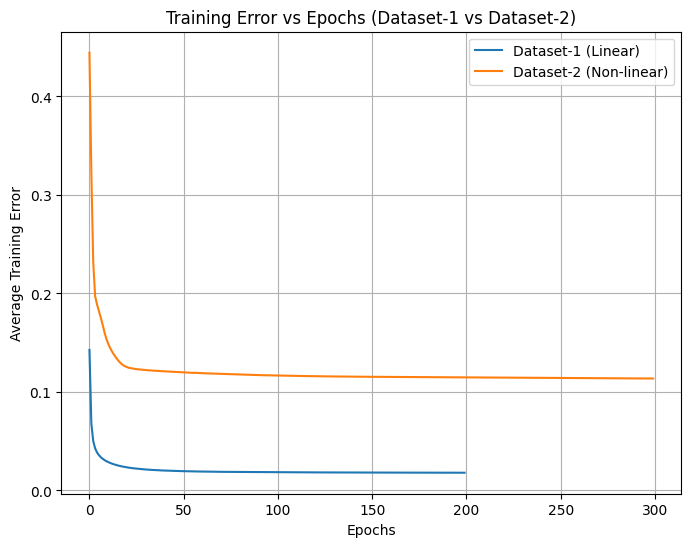

In [90]:


plt.figure(figsize=(8, 6))

plt.plot(train_errors, label="Dataset-1 (Linear)")
plt.plot(train_errors_2, label="Dataset-2 (Non-linear)")

plt.xlabel("Epochs")
plt.ylabel("Average Training Error")
plt.title("Training Error vs Epochs (Dataset-1 vs Dataset-2)")
plt.legend()
plt.grid(True)

plt.show()



In [91]:
print("For Dataset1:")
y_val_pred = []

for x in X_val:
    x = x.reshape(1, -1)

    z1 = x @ W1 + b1
    a1 = sigmoid(z1)

    z2 = a1 @ W2 + b2
    a2 = sigmoid(z2)

    y_val_pred.append(np.argmax(a2))

y_val_pred = np.array(y_val_pred)

val_accuracy = np.mean(y_val_pred == y_val)
print("Validation Accuracy:", val_accuracy)

conf_mat = np.zeros((num_classes, num_classes), dtype=int)

for true, pred in zip(y_val, y_val_pred):
    conf_mat[true, pred] += 1

print("Validation Confusion Matrix:")
print(conf_mat)

print("\nFor Dataset2:")

y2_val_pred = []

for x in X2_val:
    x = x.reshape(1, -1)

    a1 = sigmoid(x @ W1 + b1)
    a2 = sigmoid(a1 @ W2 + b2)
    a3 = sigmoid(a2 @ W3 + b3)

    y2_val_pred.append(np.argmax(a3))

y2_val_pred = np.array(y2_val_pred)

print("Validation Accuracy :",
      np.mean(y2_val_pred == y2_val))
# ---- CONFUSION MATRIX (Dataset-2) ----
conf_mat_2 = np.zeros((num_classes2, num_classes2), dtype=int)

for true, pred in zip(y2_val, y2_val_pred):
    conf_mat_2[true, pred] += 1

print("Validation Confusion Matrix:")
print(conf_mat_2)

For Dataset1:
Validation Accuracy: 0.9233333333333333
Validation Confusion Matrix:
[[ 91   0   9]
 [  0 100   0]
 [  0  14  86]]

For Dataset2:
Validation Accuracy : 1.0
Validation Confusion Matrix:
[[100   0   0]
 [  0 100   0]
 [  0   0 100]]


Dataset-1 training complete


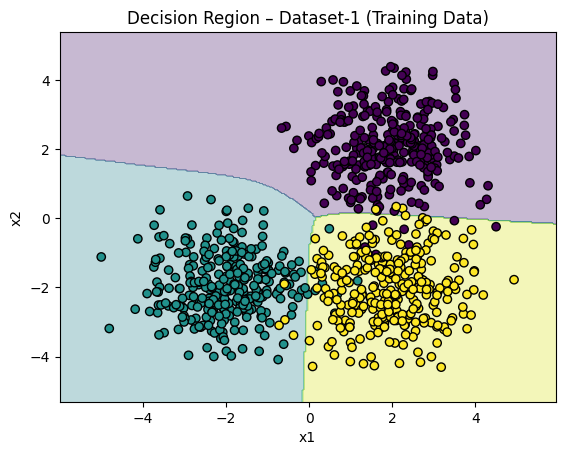

Dataset-2 training complete


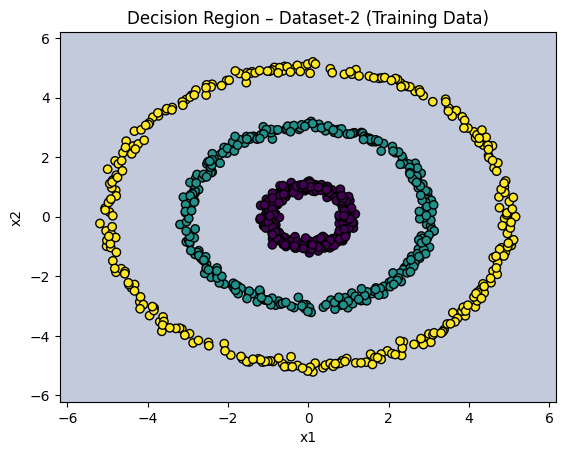

In [92]:
import numpy as np
import matplotlib.pyplot as plt

# --------------------------------------------------
# Activation functions
# --------------------------------------------------
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    s = sigmoid(z)
    return s * (1 - s)

# --------------------------------------------------
# Load dataset
# --------------------------------------------------
def load_dataset(file_path):
    X, y = [], []
    with open(file_path, 'r') as f:
        lines = f.readlines()

    i = 0
    class_label = 0
    while i < len(lines):
        n = int(lines[i].strip())
        i += 1
        for _ in range(n):
            x1, x2 = map(float, lines[i].split())
            X.append([x1, x2])
            y.append(class_label)
            i += 1
        class_label += 1

    return np.array(X), np.array(y), class_label

# --------------------------------------------------
# Split dataset
# --------------------------------------------------
def split_dataset(X, y, num_classes):
    X_train, y_train, X_val, y_val, X_test, y_test = [], [], [], [], [], []

    for c in range(num_classes):
        idx = np.where(y == c)[0]
        np.random.shuffle(idx)

        n = len(idx)
        n_train = int(0.6 * n)
        n_val = int(0.2 * n)

        for i in idx[:n_train]:
            X_train.append(X[i])
            y_train.append(y[i])
        for i in idx[n_train:n_train+n_val]:
            X_val.append(X[i])
            y_val.append(y[i])
        for i in idx[n_train+n_val:]:
            X_test.append(X[i])
            y_test.append(y[i])

    return (np.array(X_train), np.array(y_train),
            np.array(X_val), np.array(y_val),
            np.array(X_test), np.array(y_test))

# --------------------------------------------------
# One-hot encoding
# --------------------------------------------------
def one_hot(y, num_classes):
    Y = np.zeros((len(y), num_classes))
    for i, label in enumerate(y):
        Y[i, label] = 1
    return Y

# ==================================================
# DATASET-1 : LOAD + TRAIN
# ==================================================
X, y, num_classes = load_dataset("linear_separable.txt")
X_train, y_train, X_val, y_val, X_test, y_test = split_dataset(X, y, num_classes)
Y_train = one_hot(y_train, num_classes)

# Network
input_dim = 2
hidden_dim = 4
output_dim = num_classes
learning_rate = 0.01
epochs = 300

np.random.seed(42)
W1_l = np.random.randn(input_dim, hidden_dim) * 0.01
b1_l = np.zeros((1, hidden_dim))
W2_l = np.random.randn(hidden_dim, output_dim) * 0.01
b2_l = np.zeros((1, output_dim))

train_errors = []

# -------- TRAINING LOOP (IMPORTANT FIX) --------
for epoch in range(epochs):
    total_error = 0
    indices = np.random.permutation(len(X_train))

    for i in indices:
        x = X_train[i].reshape(1, -1)
        y_true = Y_train[i].reshape(1, -1)

        # Forward
        z1 = x @ W1_l + b1_l
        a1 = sigmoid(z1)
        z2 = a1 @ W2_l + b2_l
        a2 = sigmoid(z2)

        total_error += 0.5 * np.sum((y_true - a2) ** 2)

        # Backprop
        delta_out = (y_true - a2) * sigmoid_derivative(z2)
        delta_hidden = delta_out @ W2_l.T * sigmoid_derivative(z1)

        # Update
        W2_l += learning_rate * (a1.T @ delta_out)
        b2_l += learning_rate * delta_out
        W1_l += learning_rate * (x.T @ delta_hidden)
        b1_l += learning_rate * delta_hidden

    train_errors.append(total_error / len(X_train))

print("Dataset-1 training complete")

# ==================================================
# DECISION REGION PLOT (NOW WILL BE CLEAR ✅)
# ==================================================
def plot_decision_region_fcnn(X, y, W1, b1, W2, b2, title):
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )

    grid = np.c_[xx.ravel(), yy.ravel()]
    preds = []

    for p in grid:
        p = p.reshape(1, -1)
        a1 = sigmoid(p @ W1 + b1)
        a2 = sigmoid(a1 @ W2 + b2)
        preds.append(np.argmax(a2))

    Z = np.array(preds).reshape(xx.shape)

    plt.figure()
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k')
    plt.title(title)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()

# ---- FINAL PLOT ----
plot_decision_region_fcnn(
    X_train, y_train,
    W1_l, b1_l, W2_l, b2_l,
    "Decision Region – Dataset-1 (Training Data)"
)

# ==================================================
# DATASET-2 : LOAD + TRAIN (2 Hidden Layers)
# ==================================================
X2, y2, num_classes2 = load_dataset("nonlinear_separable.txt")
X2_train, y2_train, X2_val, y2_val, X2_test, y2_test = split_dataset(
    X2, y2, num_classes2
)
Y2_train = one_hot(y2_train, num_classes2)

# Network architecture
input_dim = 2
hidden1_dim = 6
hidden2_dim = 3
output_dim = num_classes2
learning_rate = 0.01
epochs = 400

np.random.seed(42)

# Weights & biases (Dataset-2)
W1_nl = np.random.randn(input_dim, hidden1_dim) * 0.01
b1_nl = np.zeros((1, hidden1_dim))

W2_nl = np.random.randn(hidden1_dim, hidden2_dim) * 0.01
b2_nl = np.zeros((1, hidden2_dim))

W3_nl = np.random.randn(hidden2_dim, output_dim) * 0.01
b3_nl = np.zeros((1, output_dim))

train_errors_2 = []

# -------- TRAINING LOOP --------
for epoch in range(epochs):
    total_error = 0
    indices = np.random.permutation(len(X2_train))

    for i in indices:
        x = X2_train[i].reshape(1, -1)
        y_true = Y2_train[i].reshape(1, -1)

        # Forward
        z1 = x @ W1_nl + b1_nl
        a1 = sigmoid(z1)

        z2 = a1 @ W2_nl + b2_nl
        a2 = sigmoid(z2)

        z3 = a2 @ W3_nl + b3_nl
        a3 = sigmoid(z3)

        total_error += 0.5 * np.sum((y_true - a3) ** 2)

        # Backprop
        delta3 = (y_true - a3) * sigmoid_derivative(z3)
        delta2 = delta3 @ W3_nl.T * sigmoid_derivative(z2)
        delta1 = delta2 @ W2_nl.T * sigmoid_derivative(z1)

        # Update
        W3_nl += learning_rate * (a2.T @ delta3)
        b3_nl += learning_rate * delta3

        W2_nl += learning_rate * (a1.T @ delta2)
        b2_nl += learning_rate * delta2

        W1_nl += learning_rate * (x.T @ delta1)
        b1_nl += learning_rate * delta1

    train_errors_2.append(total_error / len(X2_train))

print("Dataset-2 training complete")
def plot_decision_region_2hidden(X, y, W1, b1, W2, b2, W3, b3, title):
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )

    grid = np.c_[xx.ravel(), yy.ravel()]
    preds = []

    for p in grid:
        p = p.reshape(1, -1)
        a1 = sigmoid(p @ W1 + b1)
        a2 = sigmoid(a1 @ W2 + b2)
        a3 = sigmoid(a2 @ W3 + b3)
        preds.append(np.argmax(a3))

    Z = np.array(preds).reshape(xx.shape)

    plt.figure()
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k')
    plt.title(title)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()


# ---- FINAL PLOT (Dataset-2) ----
plot_decision_region_2hidden(
    X2_train, y2_train,
    W1_nl, b1_nl, W2_nl, b2_nl, W3_nl, b3_nl,
    "Decision Region – Dataset-2 (Training Data)"
)



In [93]:
print("For Dataset1:")
y_test_pred = []

for x in X_test:
    x = x.reshape(1, -1)

    z1 = x @ W1 + b1
    a1 = sigmoid(z1)

    z2 = a1 @ W2 + b2
    a2 = sigmoid(z2)

    y_test_pred.append(np.argmax(a2))

y_test_pred = np.array(y_test_pred)

test_accuracy = np.mean(y_test_pred == y_test)
print("Test Accuracy:", test_accuracy)


test_conf_mat = np.zeros((num_classes, num_classes), dtype=int)

for true, pred in zip(y_test, y_test_pred):
    test_conf_mat[true, pred] += 1

print("Test Confusion Matrix:")
print(test_conf_mat)


print("\nFor Dataset2:")

y2_test_pred = []

for x in X2_test:
    x = x.reshape(1, -1)
    a1 = sigmoid(x @ W1 + b1)
    a2 = sigmoid(a1 @ W2 + b2)
    a3 = sigmoid(a2 @ W3 + b3)
    y2_test_pred.append(np.argmax(a3))

y2_test_pred = np.array(y2_test_pred)

print("Test Accuracy (Dataset-2):",
      np.mean(y2_test_pred == y2_test))
cm = np.zeros((num_classes2, num_classes2), dtype=int)
for t, p in zip(y2_test, y2_test_pred):
    cm[t, p] += 1
print(cm)

For Dataset1:
Test Accuracy: 0.9466666666666667
Test Confusion Matrix:
[[ 90   0  10]
 [  0 100   0]
 [  0   6  94]]

For Dataset2:
Test Accuracy (Dataset-2): 1.0
[[100   0   0]
 [  0 100   0]
 [  0   0 100]]


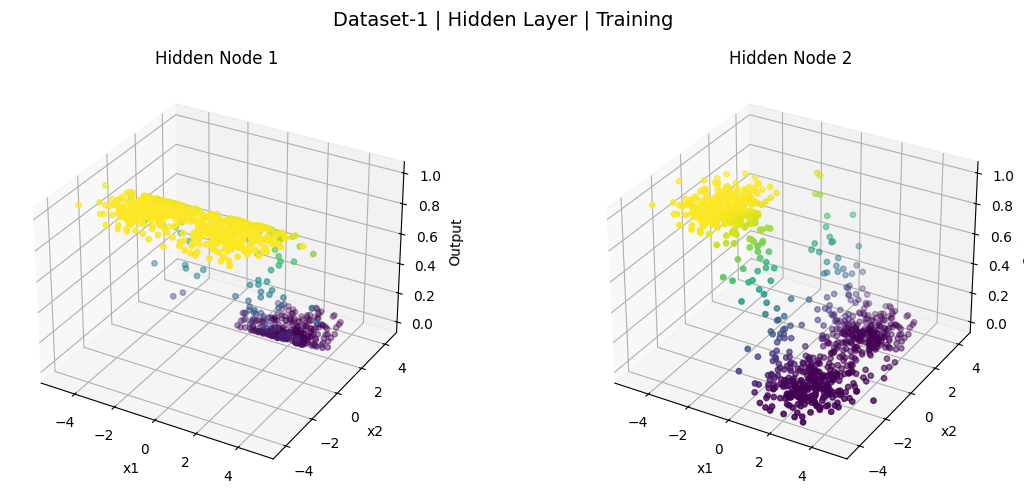

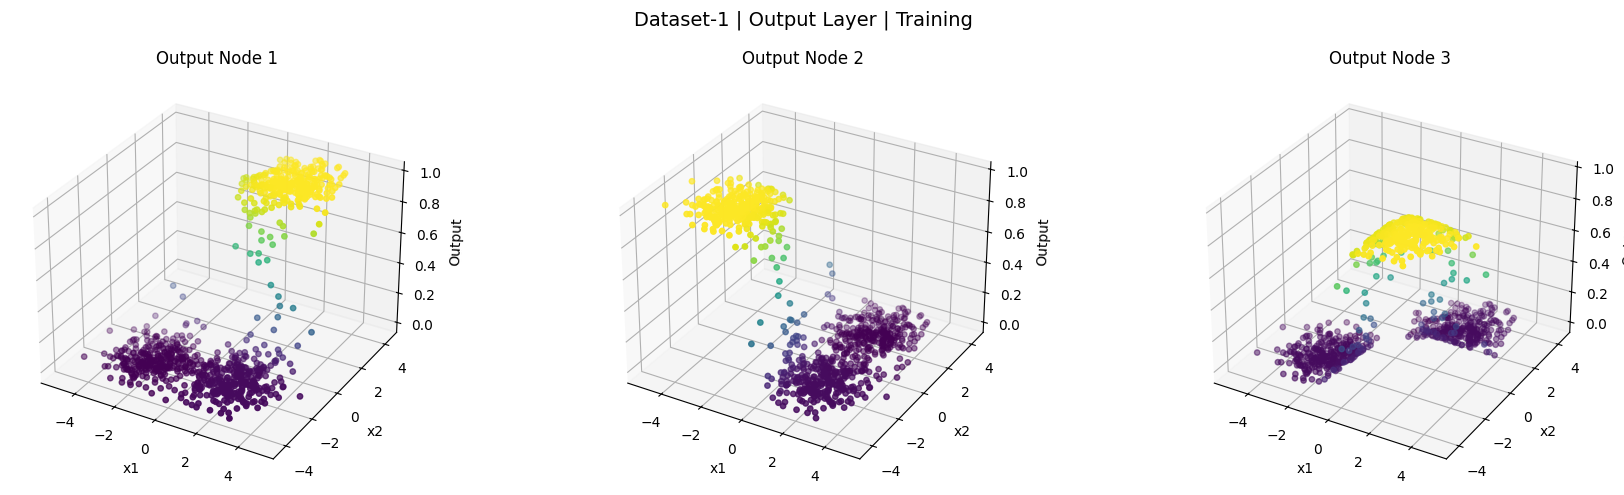

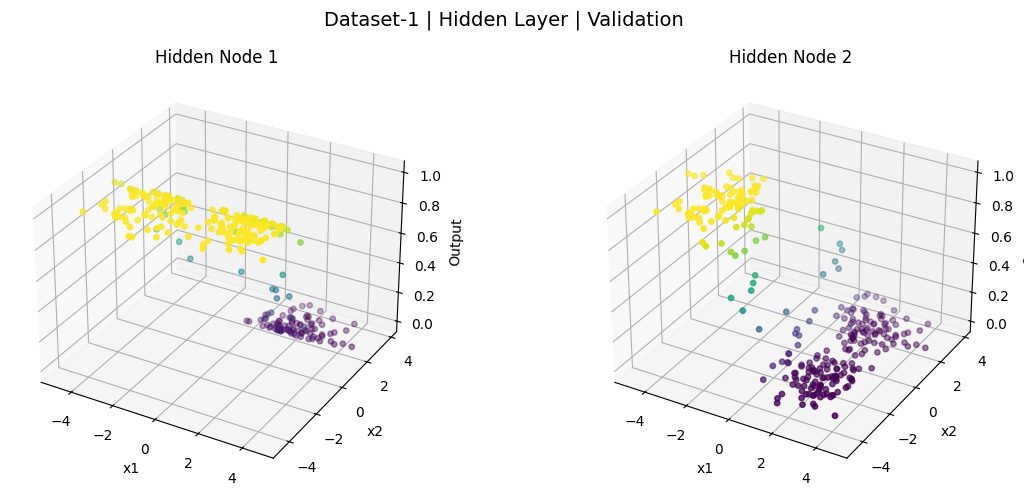

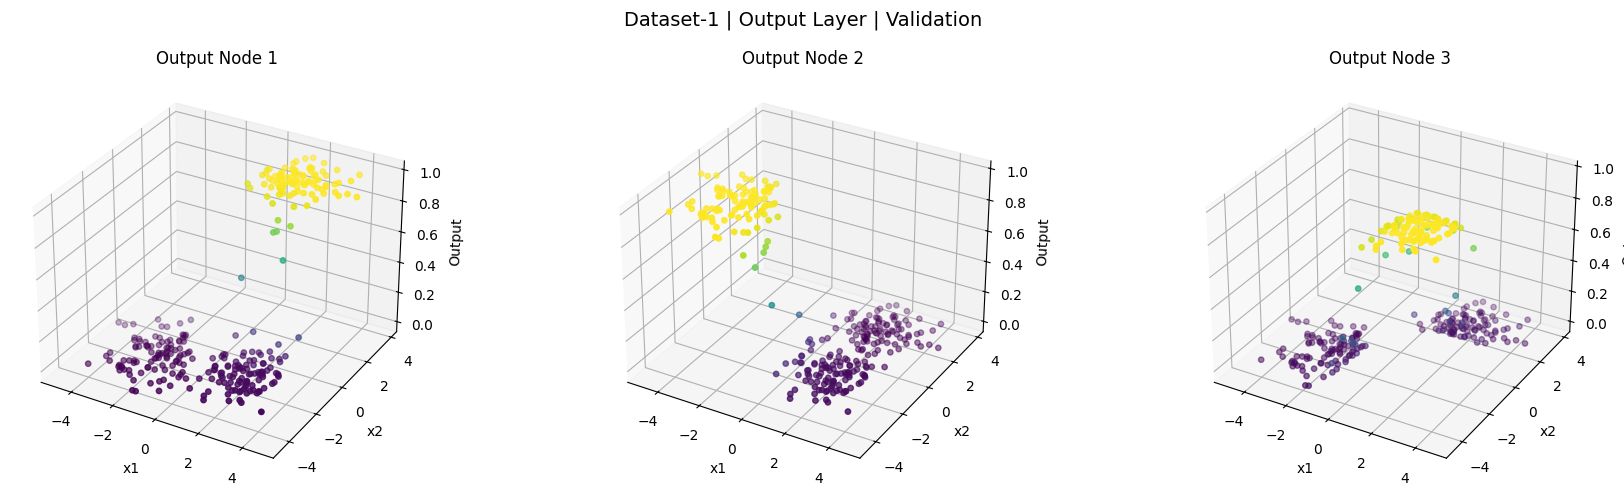

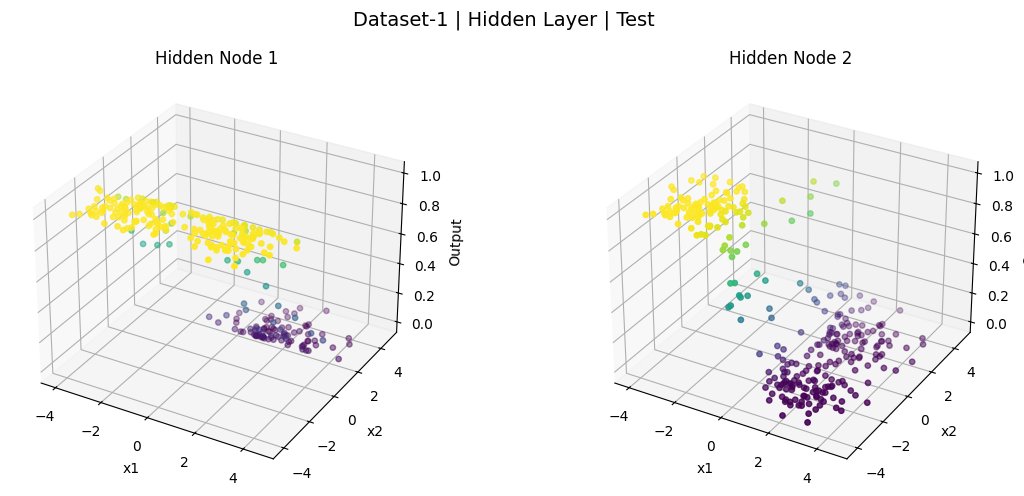

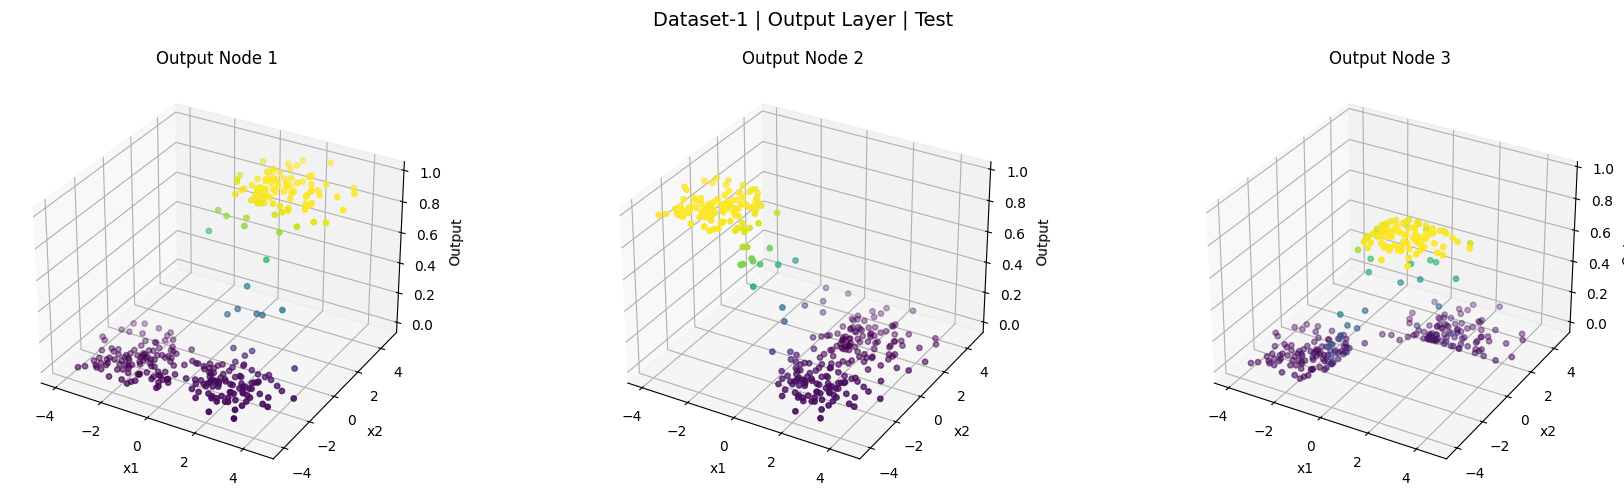

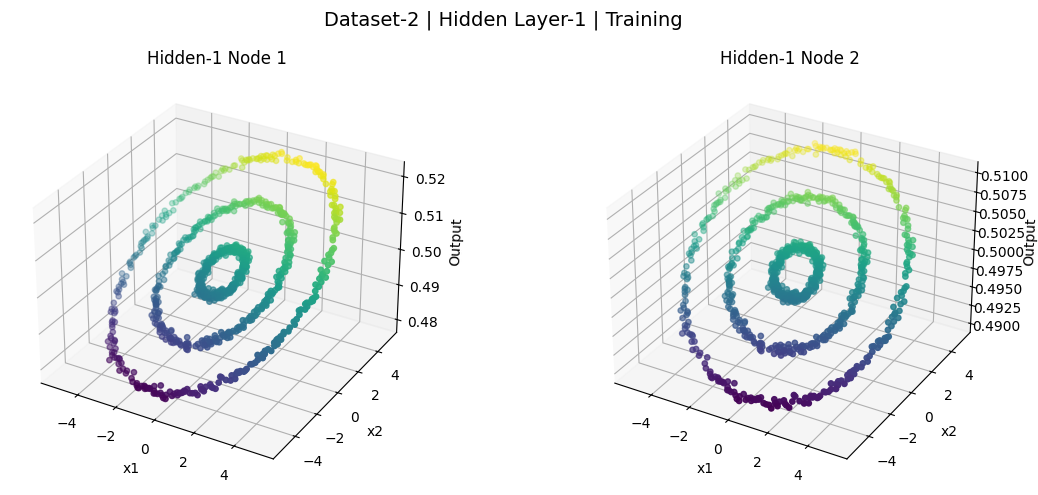

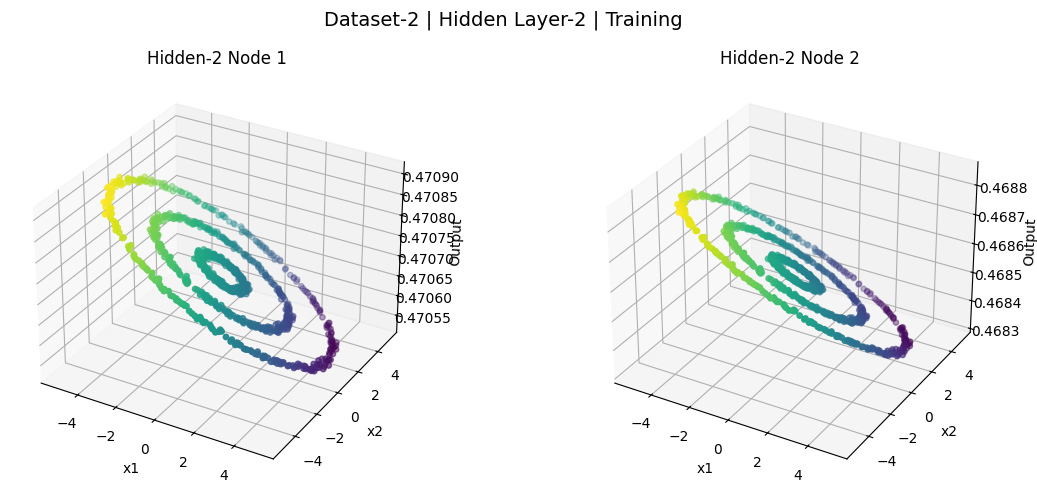

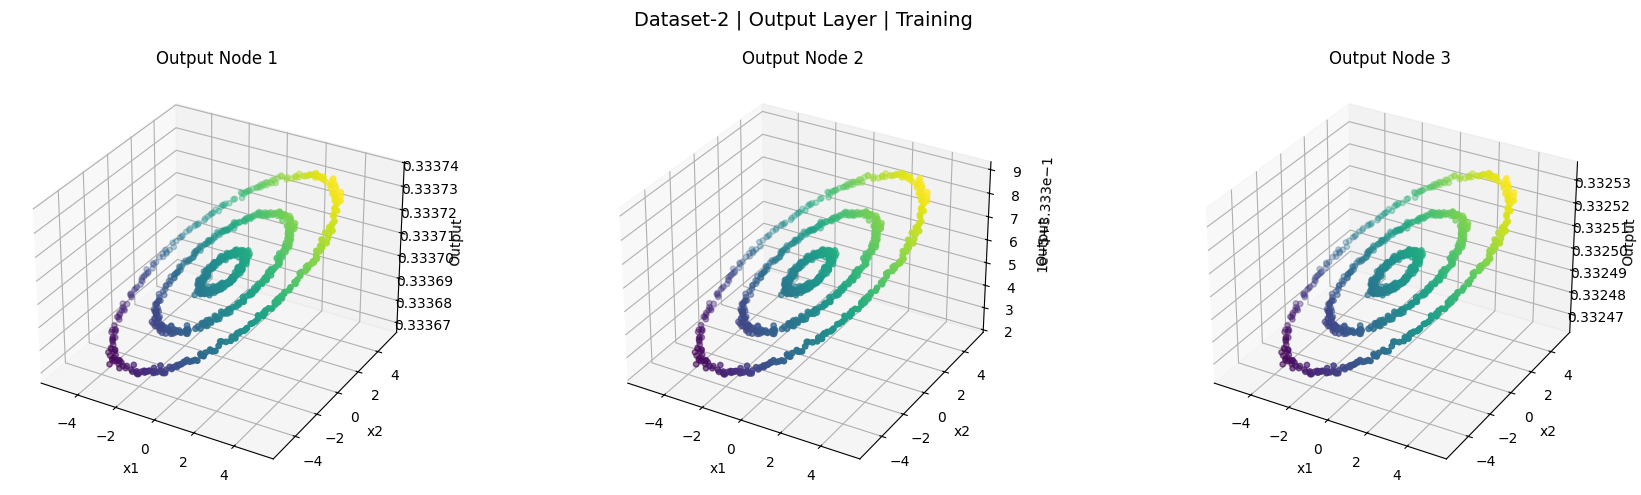

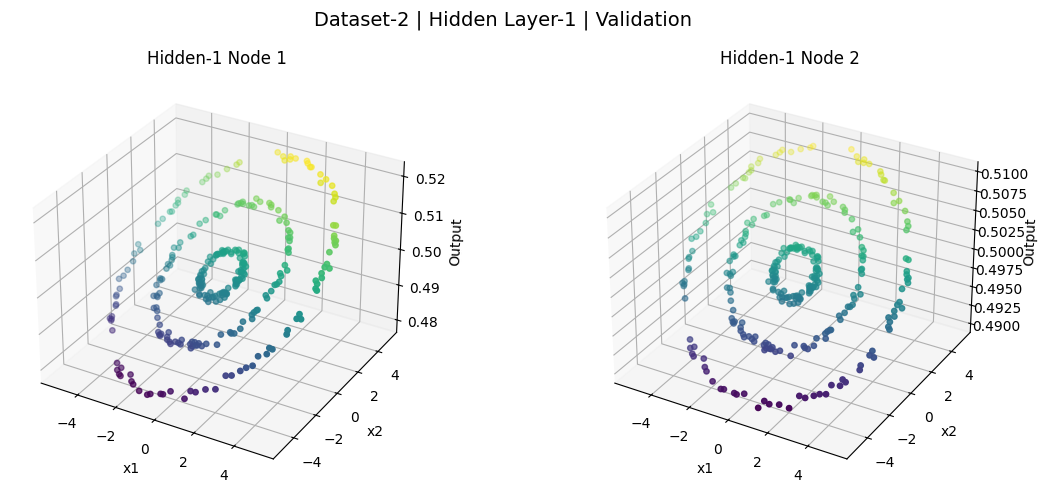

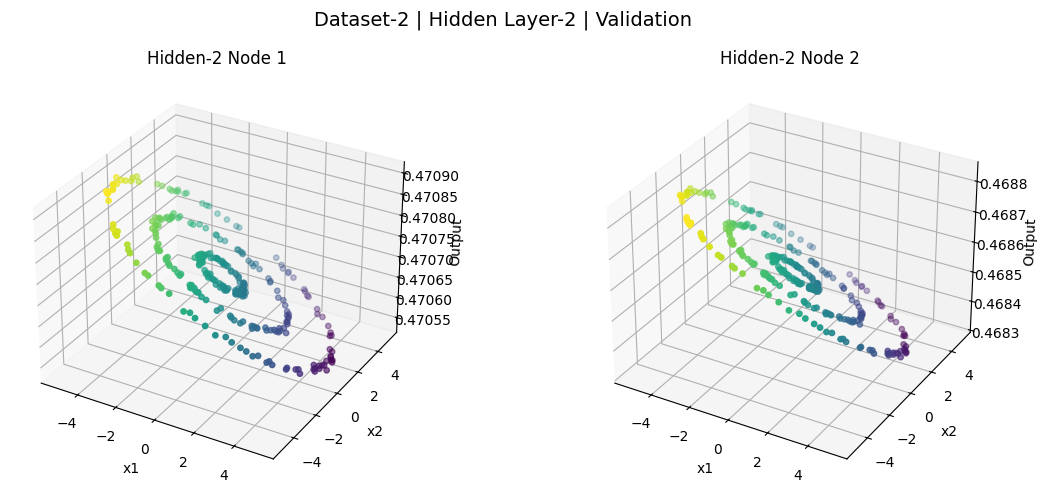

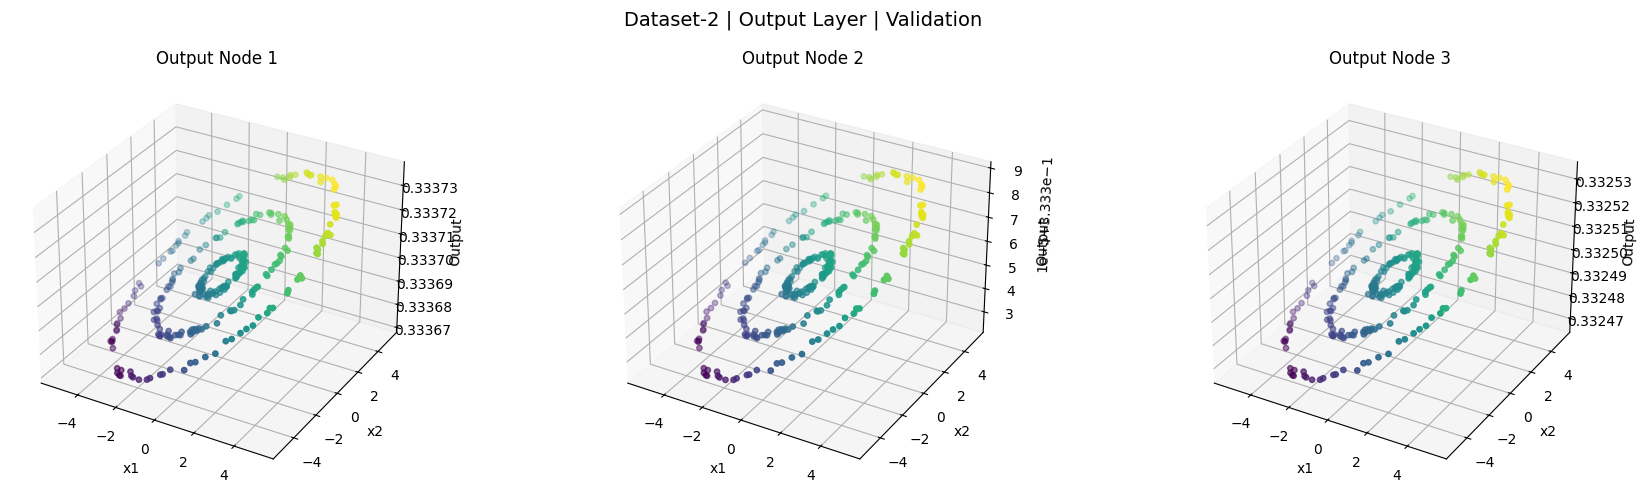

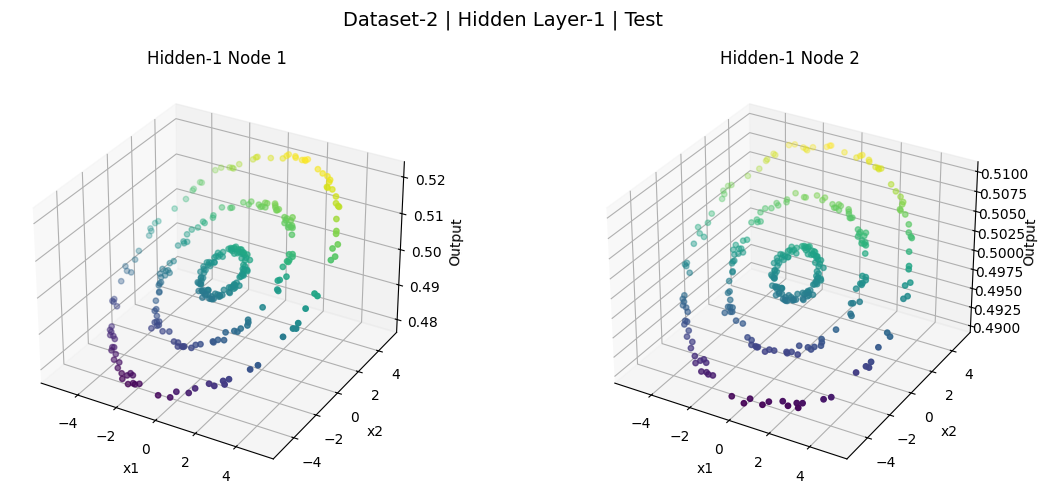

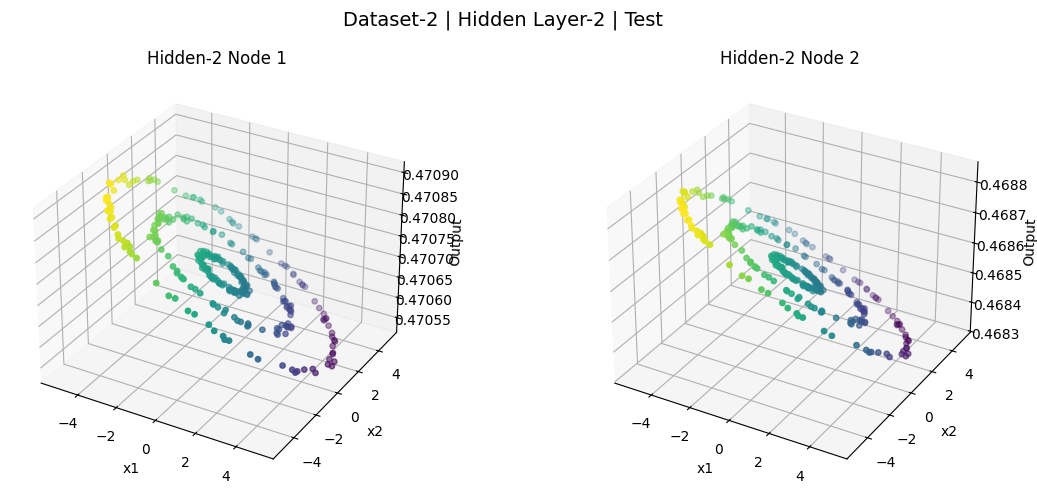

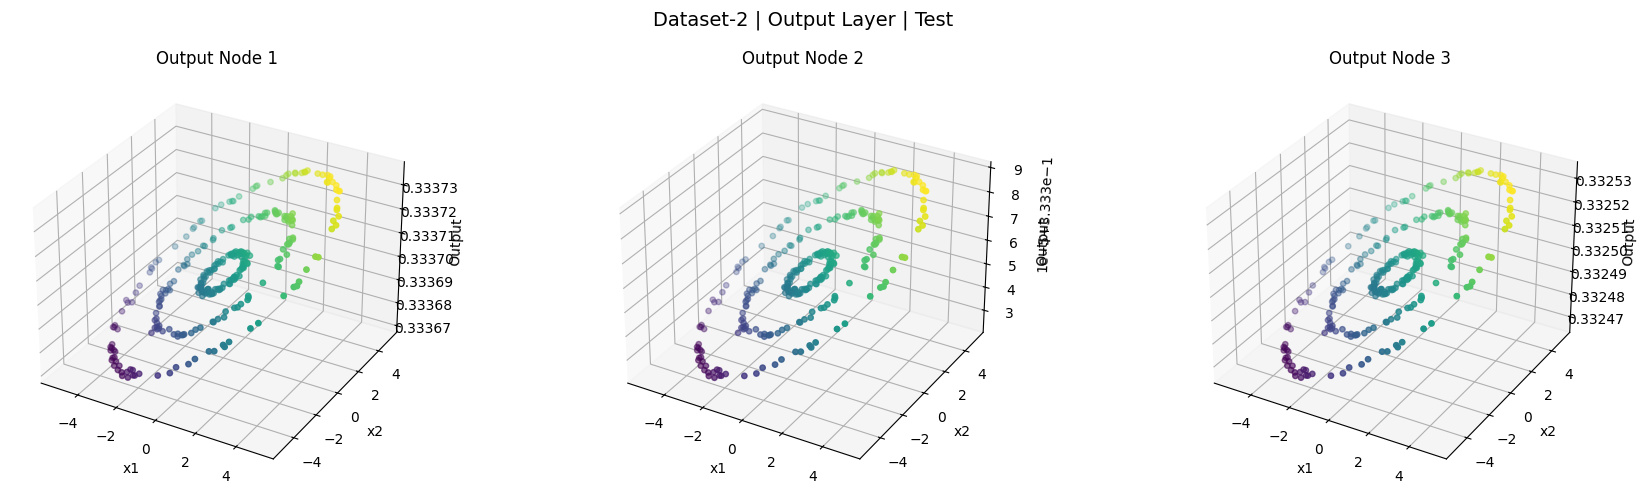

In [94]:
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_side_by_side(X, Z_list, titles, main_title):
    n = len(Z_list)
    fig = plt.figure(figsize=(6*n, 5))

    for i in range(n):
        ax = fig.add_subplot(1, n, i+1, projection='3d')
        ax.scatter(X[:,0], X[:,1], Z_list[i],
                   c=Z_list[i], cmap='viridis', s=15)
        ax.set_xlabel("x1")
        ax.set_ylabel("x2")
        ax.set_zlabel("Output")
        ax.set_title(titles[i])

    fig.suptitle(main_title, fontsize=14)
    plt.tight_layout()
    plt.show()
def forward_dataset1(X):
    a1 = sigmoid(X @ W1_l + b1_l)
    a2 = sigmoid(a1 @ W2_l + b2_l)
    return a1, a2

for name, Xd in zip(
    ["Training", "Validation", "Test"],
    [X_train, X_val, X_test]
):
    a1, a2 = forward_dataset1(Xd)

    # ---- Hidden layer (side by side) ----
    plot_3d_side_by_side(
        Xd,
        [a1[:,0], a1[:,1]],
        ["Hidden Node 1", "Hidden Node 2"],
        f"Dataset-1 | Hidden Layer | {name}"
    )

    # ---- Output layer (side by side) ----
    plot_3d_side_by_side(
        Xd,
        [a2[:,0], a2[:,1], a2[:,2]],
        ["Output Node 1", "Output Node 2", "Output Node 3"],
        f"Dataset-1 | Output Layer | {name}"
    )
def forward_dataset2(X):
    a1 = sigmoid(X @ W1_nl + b1_nl)
    a2 = sigmoid(a1 @ W2_nl + b2_nl)
    a3 = sigmoid(a2 @ W3_nl + b3_nl)
    return a1, a2, a3

for name, Xd in zip(
    ["Training", "Validation", "Test"],
    [X2_train, X2_val, X2_test]
):
    a1, a2, a3 = forward_dataset2(Xd)

    # ---- Hidden layer 1 ----
    plot_3d_side_by_side(
        Xd,
        [a1[:,0], a1[:,1]],
        ["Hidden-1 Node 1", "Hidden-1 Node 2"],
        f"Dataset-2 | Hidden Layer-1 | {name}"
    )

    # ---- Hidden layer 2 ----
    plot_3d_side_by_side(
        Xd,
        [a2[:,0], a2[:,1]],
        ["Hidden-2 Node 1", "Hidden-2 Node 2"],
        f"Dataset-2 | Hidden Layer-2 | {name}"
    )

    # ---- Output layer ----
    plot_3d_side_by_side(
        Xd,
        [a3[:,0], a3[:,1], a3[:,2]],
        ["Output Node 1", "Output Node 2", "Output Node 3"],
        f"Dataset-2 | Output Layer | {name}"
    )
